In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.ensemble import VotingRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

2022-02-03 10:59:04.723671: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [2]:
path = 'Derivatives5/'
os.listdir(path)

['test_x1.csv',
 'output_test.csv',
 'test_x2.csv',
 'train_x1.csv',
 'train_x2.csv',
 'output.csv']

In [3]:
path = 'Derivatives5/'
x1_train = pd.read_csv(path+'train_x1.csv')
x2_train = pd.read_csv(path+'train_x2.csv')

y_train = pd.read_csv(path+'output.csv')
y_test = pd.read_csv(path+'output_test.csv')

x1_test = pd.read_csv(path+'test_x1.csv')
x2_test = pd.read_csv(path+'test_x2.csv')

X_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train),axis=1))
X_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test),axis=1))

x_train,x_test = np.array(X_train),np.array(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,-0.020017,-0.025200,-0.031725,-0.039939,-0.050280,-0.063299,-0.079689,-0.100320,-0.126300,-0.159000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,-0.019016,-0.022680,-0.026966,-0.031951,-0.037710,-0.044309,-0.051798,-0.060193,-0.069464,-0.079500,0.021528,0.027102,0.034119,0.042953,0.054075,0.068076,0.085703,0.107890,0.135830,0.17100
3,-0.018541,-0.021546,-0.024944,-0.028756,-0.032996,-0.037663,-0.042733,-0.048155,-0.053835,-0.059625,0.020451,0.024392,0.029001,0.034363,0.040556,0.047653,0.055707,0.064736,0.074707,0.08550
4,0.001785,0.004372,0.008028,0.013100,0.020034,0.029402,0.041941,0.058588,0.080539,0.109310,0.039831,0.048213,0.058351,0.070614,0.085451,0.103410,0.125150,0.151480,0.183400,0.22212


In [4]:
len(X_train),len(y_test)

(116447, 58223)

Time taken by Random Forest 0:04:05.809172
Root Mean Squared error of Random Forest 0.06017755207518274
Minimum Error = 1.000000000139778e-06
Maximum Error = 1.0155199999999995
Median Value of Error = 0.017411999999999983


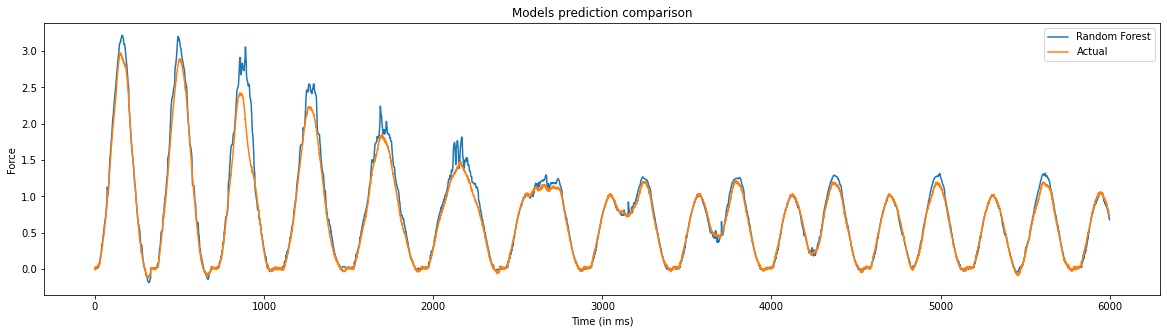

In [5]:
# Random Forest
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
y1 = y1_pred
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
    
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])
    
# COMPARISON
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

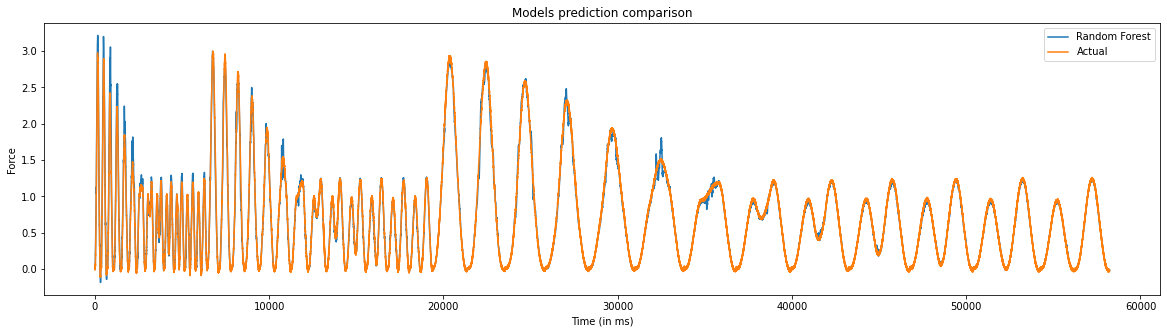

In [7]:
plt.figure(figsize=(20,5))
plt.plot(list(range(58223)),y1[:58223], label = 'Random Forest')
plt.plot(list(range(58223)),y_test[:58223], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('RF_derivatives5.jpg')
plt.show()

In [8]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.086822
0:	learn: 0.9246485	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.8496783	total: 75.6ms	remaining: 37.7s
2:	learn: 0.7806681	total: 82.3ms	remaining: 27.4s
3:	learn: 0.7181087	total: 88ms	remaining: 21.9s
4:	learn: 0.6606249	total: 93.9ms	remaining: 18.7s
5:	learn: 0.6074533	total: 99.6ms	remaining: 16.5s
6:	learn: 0.5593648	total: 106ms	remaining: 15s
7:	learn: 0.5147947	total: 112ms	remaining: 13.9s
8:	learn: 0.4745813	total: 117ms	remaining: 12.9s
9:	learn: 0.4376779	total: 123ms	remaining: 12.2s
10:	learn: 0.4035901	total: 129ms	remaining: 11.6s
11:	learn: 0.3724645	total: 134ms	remaining: 11s
12:	learn: 0.3443384	total: 139ms	remaining: 10.6s
13:	learn: 0.3189335	total: 145ms	remaining: 10.2s
14:	learn: 0.2951521	total: 150ms	remaining: 9.87s
15:	learn: 0.2741293	total: 155ms	remaining: 9.56s
16:	learn: 0.2547913	total: 160ms	remaining: 9.27s
17:	learn: 0.2370898	total: 165ms	remaining: 9.03s
18:	learn: 0.2211285	total: 171ms	remaining: 8.81s
19:	learn: 

In [9]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:04.979231
Root mean square error of Cat Boost Model:  0.05330850357556438


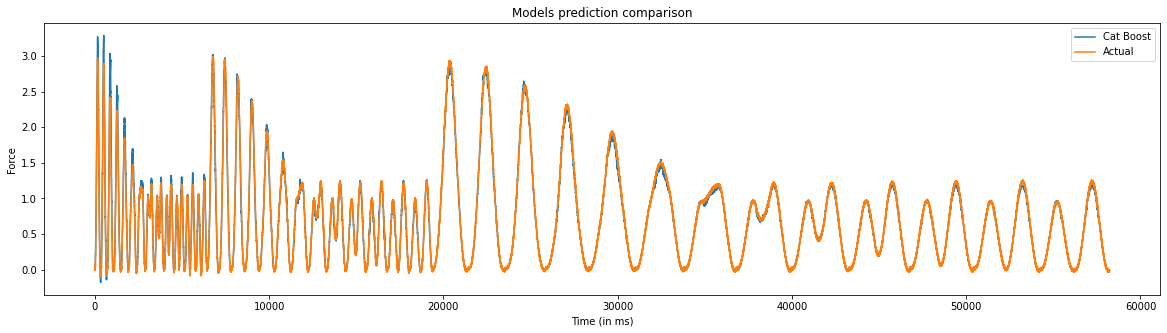

In [11]:
plt.figure(figsize=(20,5))
plt.plot(list(range(58223)),y_pred[:58223], label = 'Cat Boost')
plt.plot(list(range(58223)),y_test[:58223], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('catboost_derivatives5.jpg')
plt.show()